**KNN** - can be used for both classification and regression tasks

**Goal** - to make predictions about a data point based on the "k" closest data points in the feature space

- For classification:

KNN assigns a class to the new data point based on the majority class among its nearest neighbors.

- For regression:

KNN predicts a value by averaging the values of its nearest neighbors.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

Example for KNN Classifier

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



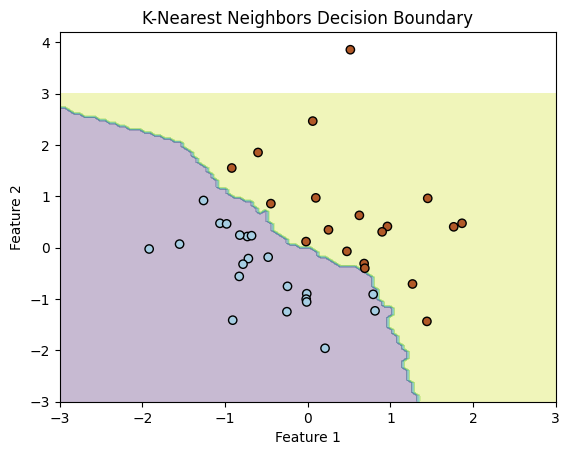

In [8]:
# Generate synthetic data
np.random.seed(42)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Create binary labels based on a decision boundary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the K-Nearest Neighbors model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Nearest Neighbors Decision Boundary")
plt.show()


Example for KNN Regressor

Regression Mean Squared Error: 0.030074201357787766


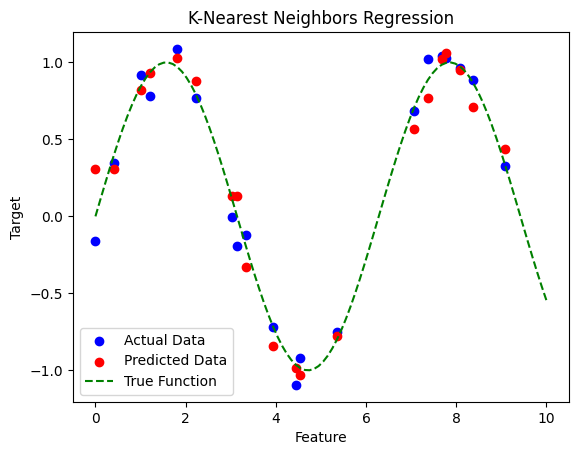

In [9]:
X_reg = np.linspace(0, 10, 100).reshape(-1, 1)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])  # Create a noisy sine wave

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = knn_regressor.predict(X_test_reg)

# Evaluate regressor
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Mean Squared Error: {mse}")

# Plot regression results
plt.scatter(X_test_reg, y_test_reg, color='blue', label='Actual Data')
plt.scatter(X_test_reg, y_pred_reg, color='red', label='Predicted Data')
plt.plot(X_reg, np.sin(X_reg), color='green', linestyle='dashed', label='True Function')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("K-Nearest Neighbors Regression")
plt.legend()
plt.show()

Metrics play a crucial role in evaluating the performance of machine learning models for classification and regression tasks. Here’s a summary of some commonly used metrics for each:

### **Classification Metrics**
1. **Accuracy**: Proportion of correctly classified instances to the total instances.
   - Formula: **(True Positives + True Negatives) / Total Instances**

2. **Precision**: Measures how many of the predicted positive instances are actually positive.
   - Formula: **True Positives / (True Positives + False Positives)**

3. **Recall (Sensitivity or TPR)**: Measures how many actual positive instances were correctly predicted.
   - Formula: **True Positives / (True Positives + False Negatives)**

4. **F1-Score**: The harmonic mean of precision and recall, used when there’s an imbalance in the dataset.
   - Formula: **2 * (Precision * Recall) / (Precision + Recall)**

5. **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)**: Evaluates the trade-off between true positive rate and false positive rate.

6. **Log Loss (Cross-Entropy Loss)**: Measures the probability of predicted values being true for multi-class classification.

---

### **Regression Metrics**
1. **Mean Squared Error (MSE)**: The average of squared differences between predicted and actual values.
   - Formula: **(1/n) * Σ (Actual - Predicted)^2**

2. **Root Mean Squared Error (RMSE)**: The square root of MSE, providing the error in the original unit of the target variable.
   - Formula: **√MSE**

3. **Mean Absolute Error (MAE)**: The average of absolute differences between predicted and actual values.
   - Formula: **(1/n) * Σ |Actual - Predicted|**

4. **R² Score (Coefficient of Determination)**: Measures how well the regression predictions approximate the actual data.
   - Formula: **1 - (Sum of Squared Errors / Total Variance of the Data)**

5. **Mean Absolute Percentage Error (MAPE)**: The average percentage difference between actual and predicted values.
   - Formula: **(1/n) * Σ (|Actual - Predicted| / Actual) × 100**

6. **Huber Loss**: A hybrid loss function that is robust to outliers, combining MSE and MAE behavior.

In [14]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss,
    mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
)

In [15]:
# Evaluate classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Classification Metrics:\n Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1-Score: {f1}")


Classification Metrics:
 Accuracy: 1.0
 Precision: 1.0
 Recall: 1.0
 F1-Score: 1.0


In [16]:
# Evaluate regressor
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

print(f"Regression Metrics:\n MSE: {mse}\n RMSE: {rmse}\n MAE: {mae}\n R2 Score: {r2}\n MAPE: {mape}")


Regression Metrics:
 MSE: 0.030074201357787766
 RMSE: 0.17341914933993813
 MAE: 0.13404374725345916
 R2 Score: 0.9415498807545023
 MAPE: 1.3859792605147958
